<a href="https://colab.research.google.com/github/g6104018-lang/repository2/blob/main/predcci/Predicci%C3%B3n_de_popularidad_de_una_canci%C3%B3n_Versi%C3%B3n_Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv"
df = pd.read_csv(url)


In [2]:
df
# Seleccionar características (features)
features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
X = df[features].values

# Target numérico
y = df['popularity'].values


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [6]:
model.compile(
    optimizer=adam_optimizer,
    loss='mse',
    metrics=['mae'],
)

In [7]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=50,
)

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 85389912.0000 - mae: 2302.8547 - val_loss: 3233.7671 - val_mae: 51.5320
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1667.1530 - mae: 27.6368 - val_loss: 672.9189 - val_mae: 20.7836
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9307.2100 - mae: 46.3676 - val_loss: 590.1514 - val_mae: 20.1168
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 65910.0703 - mae: 102.4558 - val_loss: 1705.3694 - val_mae: 34.5011
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 9335.9277 - mae: 49.6585 - val_loss: 29558.9336 - val_mae: 157.4264
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 514800.4375 - mae: 155.9099 - val_loss: 605.5260 - val_mae: 20.2119
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1788.1290 - mae: 25.8414 - val_loss: 43591.8242 - val_mae: 191.3201
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 106896.3594 - mae: 93.5852 - 

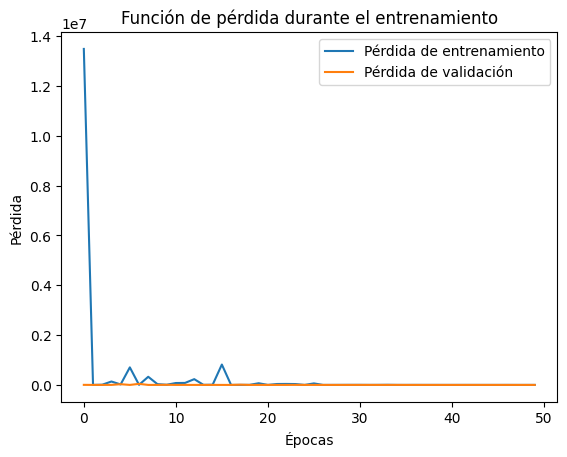

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [9]:
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE en el conjunto test: {mae}")


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 547.1382 - mae: 19.6013
MAE en el conjunto test: 19.55118179321289


In [10]:
import pandas as pd

predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   Actual  Predicted
0      50  33.855953
1      11  24.906555
2       0  21.620886
3       0  24.576622
4      57  23.401737


In [11]:
nombre_cancion = "Beso"

canciones_df = df[df['track_name'].str.contains(nombre_cancion, case=False, na=False)]

print(f"Canciones encontradas:")
canciones_df[['track_name', 'artists', 'album_name']].head()


Canciones encontradas:


,track_name,artists,album_name
1655,Un Beso de Desayuno,Calle 13,Residente o Visitante
17425,Beso Con Baba,Meth Math;Dinamarca,m♡rtal
21293,Son Tus Besos,Cestar,El Verdadero Amor
23145,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,Toolroom Amsterdam 2022
23927,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,El Beso (feat. Mathieu Ruz)


In [17]:
# indice a selecionar
i = 0
cancion = canciones_df.iloc[i]
X_input = cancion[features].values.reshape(1, -1)
X_input = scaler.transform(X_input)

prediccion = model.predict(X_input)[0][0]
print(f"Canción: {cancion['track_name']} - {cancion['artists']}")
print(f"Popularidad real: {cancion['popularity']}")
print(f"Predicción: {prediccion:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Canción: Un Beso de Desayuno - Calle 13
Popularidad real: 20
Predicción: 4.73


In [14]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: -0.10125243663787842
MSE: 543.4470825195312
